In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./test/19.jpg')
img.shape

(320, 266, 3)

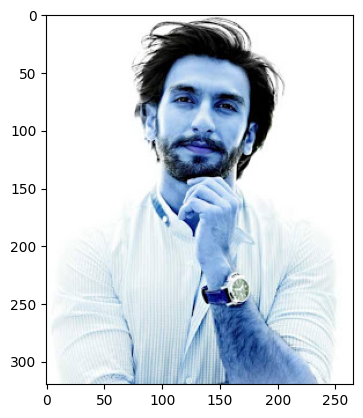

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(320, 266)

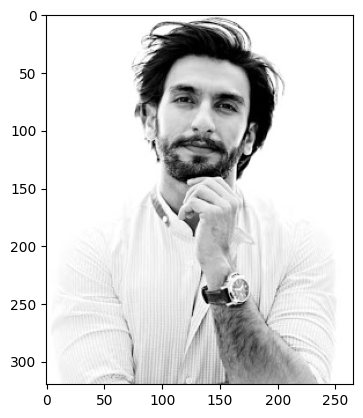

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('C:\Programming\MachineLearning\project\ImageClassification\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:\Programming\MachineLearning\project\ImageClassification\model\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_19056\2562044181.py:1: SyntaxWarning: invalid escape sequence '\P'
  face_cascade = cv2.CascadeClassifier('C:\Programming\MachineLearning\project\ImageClassification\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
C:\Users\Vaibhav\AppData\Local\Temp\ipykernel_19056\2562044181.py:2: SyntaxWarning: invalid escape sequence '\P'
  eye_cascade = cv2.CascadeClassifier('C:\Programming\MachineLearning\project\ImageClassification\model\opencv\haarcascades\haarcascade_eye.xml')


array([[ 79,  32, 114, 114]])

In [7]:
(x,y,w,h) = faces[0]

In [8]:
x,y,w,h

(79, 32, 114, 114)

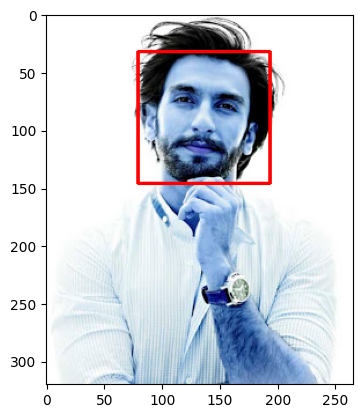

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

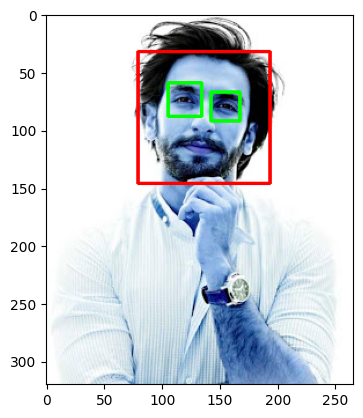

In [10]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)

    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

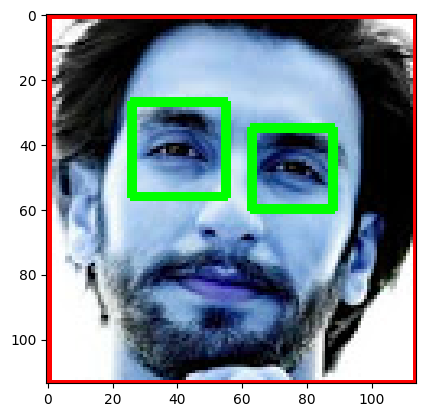

In [11]:
plt.imshow(roi_color,cmap='gray')

In [12]:
def cropped_image_with_two_eyes (image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.1,5)
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

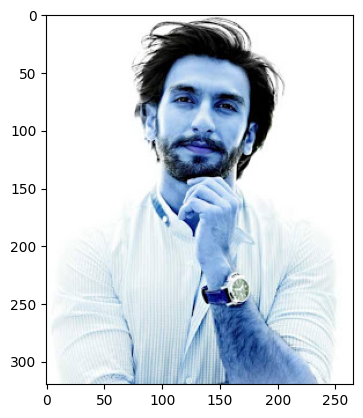

In [13]:
org_img = cv2.imread('./test/19.jpg')
plt.imshow(org_img)

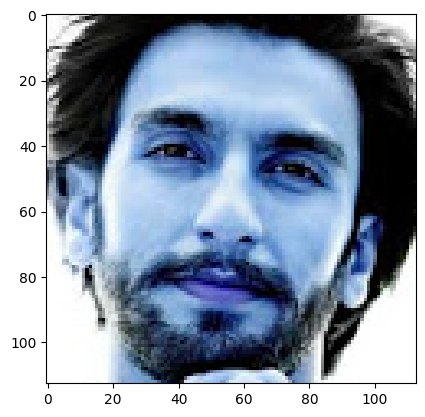

In [14]:
crp_img_fnc_test = cropped_image_with_two_eyes('./test/19.jpg')
plt.imshow(crp_img_fnc_test)

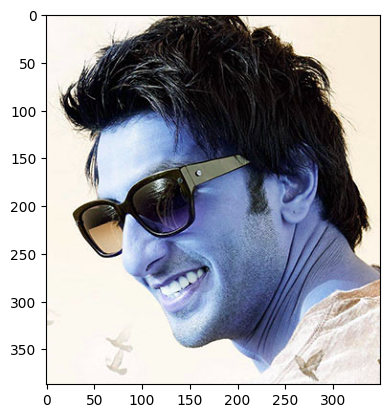

In [15]:
org_img2 = cv2.imread('./test/26.jpg')
plt.imshow(org_img2)

In [16]:
'''It should show error
crp_img_fnc_test2 = cropped_image_with_two_eyes('./test/26.jpg')
plt.imshow(crp_img_fnc_test2)'''

"It should show error\ncrp_img_fnc_test2 = cropped_image_with_two_eyes('./test/26.jpg')\nplt.imshow(crp_img_fnc_test2)"

In [17]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [18]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./dataset/cropped',
 './dataset/Johnny Depp',
 './dataset/Kareena Kapoor',
 './dataset/Kriti Sanon',
 './dataset/Priyanka Chopra',
 './dataset/Tom Cruise']

In [20]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)

os.mkdir(path_to_cr_data)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = cropped_image_with_two_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder : ",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + '.jpg'
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
Johnny Depp
Generating cropped images in folder :  ./dataset/cropped/Johnny Depp
Kareena Kapoor
Generating cropped images in folder :  ./dataset/cropped/Kareena Kapoor
Kriti Sanon
Generating cropped images in folder :  ./dataset/cropped/Kriti Sanon
Priyanka Chopra
Generating cropped images in folder :  ./dataset/cropped/Priyanka Chopra
Tom Cruise
Generating cropped images in folder :  ./dataset/cropped/Tom Cruise


In [27]:
import pywt

def w2d(img, mode='haar', level=1):
    imArray = img

    imArray = cv2.cvtColor(imArray,cv2.COLOR_RGB2GRAY)

    imArray = np.float32(imArray)
    imArray /= 255

    coeffs = pywt.wavedec2(imArray , mode , level = level)

    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;

    imArray_H = pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)

    return imArray_H

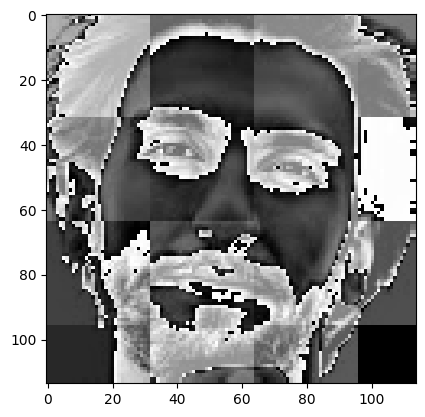

In [28]:
im_har = w2d(crp_img_fnc_test,'db1',5)
plt.imshow(im_har, cmap='gray')

In [43]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Johnny Depp': ['./dataset/cropped/Johnny Depp\\Johnny Depp1.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp10.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp11.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp12.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp13.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp14.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp15.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp16.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp17.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp18.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp19.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp2.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp20.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp21.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp22.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp23.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp24.jpg',
  './dataset/cropped/Johnny Depp\\Johnny Depp25.jpg',
  './dataset/cr

In [44]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1

class_dict

{'Johnny Depp': 0,
 'Kareena Kapoor': 1,
 'Kriti Sanon': 2,
 'Priyanka Chopra': 3,
 'Tom Cruise': 4}

In [45]:
X , y = [] , []

for celebrity_name , training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])


In [46]:
len(X[0])

4096

In [47]:
len(y)

635

In [48]:
X[0]

array([[ 94],
       [130],
       [169],
       ...,
       [  5],
       [190],
       [  0]], dtype=uint8)

In [49]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(635, 4096)

In [50]:
X[0]

array([ 94., 130., 169., ...,   5., 190.,   0.])

In [51]:
'''Data Cleaning Done'''

'Data Cleaning Done'

In [58]:
'''We will use SVM classifier'''

'We will use SVM classifier'

In [52]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [54]:
X_train , X_test , y_train, y_test = train_test_split(X , y , random_state=0)

pipe = Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.779874213836478

In [56]:
len(X_test)

159

In [57]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.44      0.59        18
           1       0.73      0.92      0.81        36
           2       0.75      0.92      0.82        51
           3       0.84      0.69      0.76        39
           4       0.90      0.60      0.72        15

    accuracy                           0.78       159
   macro avg       0.82      0.71      0.74       159
weighted avg       0.80      0.78      0.77       159



In [59]:
'''Now We will use GridSearchCV'''

'Now We will use GridSearchCV'

In [61]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [62]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [67]:
scores = []
best_estimators = {}
import pandas as pd
for algo , mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe , mp['params'], cv = 5 ,return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df = pd.DataFrame(scores,columns=['model' , 'best_score' , 'best_params'])
df

,model,best_score,best_params
0,svm,0.802456,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.573553,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.804561,{'logisticregression__C': 1}


In [68]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [70]:
best_estimators['svm'].score(X_test,y_test)

0.8050314465408805

In [71]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8301886792452831

In [72]:
'''Best Model is found to be the logistics model'''

'Best Model is found to be the logistics model'

In [73]:
best_clf = best_estimators['logistic_regression']

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[16,  0,  1,  0,  1],
       [ 0, 34,  2,  0,  0],
       [ 1,  4, 42,  3,  1],
       [ 2,  3,  6, 28,  0],
       [ 1,  0,  0,  2, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

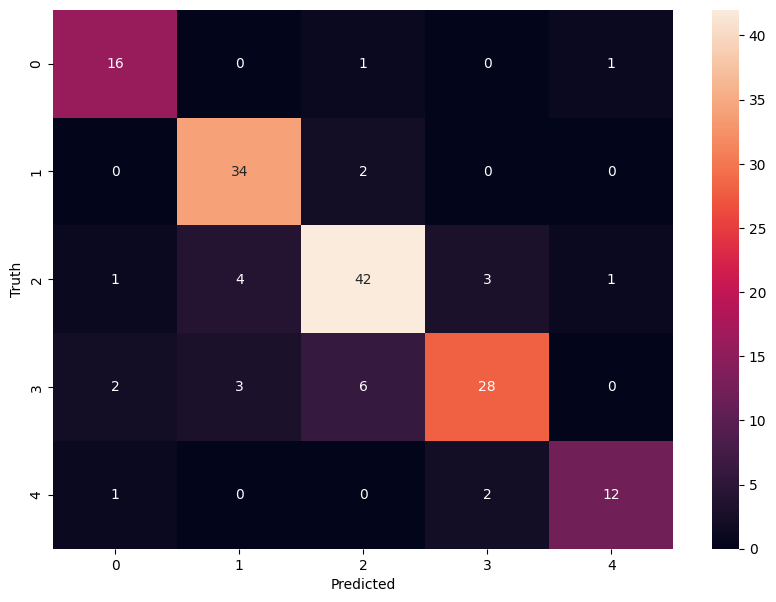

In [76]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
class_dict

{'Johnny Depp': 0,
 'Kareena Kapoor': 1,
 'Kriti Sanon': 2,
 'Priyanka Chopra': 3,
 'Tom Cruise': 4}

In [78]:
'''Saving our model'''

'Saving our model'

In [79]:
import joblib

#Saving model into a pickle file
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [82]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))